## Import Dataset and exploration

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob

# Read in cars and notcars
images = glob.glob('Dataset/*/*/*')
cars = []
notcars = []
for image in images:
    if 'non' in image:
        notcars.append(image)
    else:
        cars.append(image)
        
# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    return data_dict
    
data_info = data_look(cars, notcars)

print('The size of the imported dataset: ', len(cars)+len(notcars))
print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
    
# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])


# Plot the examples
fig1 = plt.figure()
plt.subplot(121)
plt.imshow(car_image)
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Example Not-car Image')
fig1.savefig('output_images/car_not_car.jpg', bbox_inches = 'tight')

The size of the imported dataset:  17760
Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


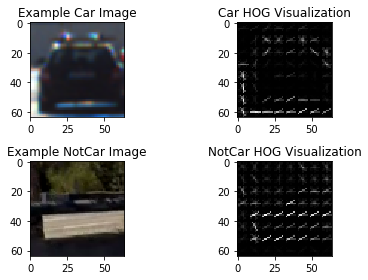

In [16]:
from skimage.feature import hog
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        # Use skimage.hog() to get both features and a visualization
        features, hog_image = hog(img, orientations=orient,
                          pixels_per_cell=(pix_per_cell, pix_per_cell), 
                          cells_per_block=(cell_per_block, cell_per_block), 
                          visualise=True, feature_vector=True, block_norm='L2-Hys')
        
        return features, hog_image
    else:      
        # Use skimage.hog() to get features only
        features = hog(img, orientations=orient,
                          pixels_per_cell=(pix_per_cell, pix_per_cell), 
                          cells_per_block=(cell_per_block, cell_per_block), 
                          visualise=False, feature_vector=feature_vec, block_norm='L2-Hys')
        return features
    
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
    
# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])

# Read in the image

car_gray = cv2.cvtColor(car_image, cv2.COLOR_RGB2GRAY)
notcar_gray = cv2.cvtColor(notcar_image, cv2.COLOR_RGB2GRAY)

# Define HOG parameters
orient = 8
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
car_features, car_hog_image = get_hog_features(car_gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)
notcar_features, notcar_hog_image = get_hog_features(notcar_gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)
# Plot the examples
fig2 = plt.figure()
plt.subplot(221)
plt.imshow(car_image, cmap='gray')
plt.title('Example Car Image')
plt.subplot(222)
plt.imshow(car_hog_image, cmap='gray')
plt.title('Car HOG Visualization')

plt.subplot(223)
plt.imshow(notcar_image, cmap='gray')
plt.title('Example NotCar Image')
plt.subplot(224)
plt.imshow(notcar_hog_image, cmap='gray')
plt.title('NotCar HOG Visualization')

plt.tight_layout()
fig2.savefig('output_images/HOG_example.jpg', bbox_inches = 'tight')

In [56]:
from skimage.feature import hog
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        # Use skimage.hog() to get both features and a visualization
        features, hog_image = hog(img, orientations=orient,
                          pixels_per_cell=(pix_per_cell, pix_per_cell), 
                          cells_per_block=(cell_per_block, cell_per_block), 
                          visualise=True, feature_vector=True, block_norm='L2-Hys')
        
        return features, hog_image
    else:      
        # Use skimage.hog() to get features only
        features = hog(img, orientations=orient,
                          pixels_per_cell=(pix_per_cell, pix_per_cell), 
                          cells_per_block=(cell_per_block, cell_per_block), 
                          visualise=False, feature_vector=feature_vec, block_norm='L2-Hys')
        return features
    
# Define a function to compute binned color features  
def bin_spatial(img, size=(16, 16)):
    return cv2.resize(img, size).ravel() 

# Define a function to compute color histogram features 
def color_hist(img, nbins=32):
    ch1 = np.histogram(img[:,:,0], bins=nbins, range=(0, 256))[0]#We need only the histogram, no bins edges
    ch2 = np.histogram(img[:,:,1], bins=nbins, range=(0, 256))[0]
    ch3 = np.histogram(img[:,:,2], bins=nbins, range=(0, 256))[0]
    hist = np.hstack((ch1, ch2, ch3))
    return hist

#Define a function to extract features from a list of images
def img_features(feature_image, spatial_feat, hist_feat, hog_feat, hist_bins, orient, 
                        pix_per_cell, cell_per_block, hog_channel):
    file_features = []
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #print 'spat', spatial_features.shape
        file_features.append(spatial_features)
    if hist_feat == True:
         # Apply color_hist()
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #print 'hist', hist_features.shape
        file_features.append(hist_features)
    if hog_feat == True:
    # Call get_hog_features() with vis=False, feature_vec=True
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)        
        else:
            feature_image = cv2.cvtColor(feature_image, cv2.COLOR_LUV2RGB)
            feature_image = cv2.cvtColor(feature_image, cv2.COLOR_RGB2GRAY)
            hog_features = get_hog_features(feature_image[:,:], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
                #print 'hog', hog_features.shape
            # Append the new feature vector to the features list
        file_features.append(hog_features)
    return file_features

def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                     spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each imageone by one
        image = cv2.imread(file) 
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)  
            
        file_features = img_features(feature_image, spatial_feat, hist_feat, hog_feat, hist_bins, orient, 
                        pix_per_cell, cell_per_block, hog_channel)
        features.append(np.concatenate(file_features))
        
        # Augment the dataset with flipped images
        feature_image=cv2.flip(feature_image,1) 
        file_features = img_features(feature_image, spatial_feat, hist_feat, hog_feat, hist_bins, orient, 
                        pix_per_cell, cell_per_block, hog_channel)
        features.append(np.concatenate(file_features))
    return features # Return list of feature vectors

def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)
    #9) Return concatenated array of features
    return np.concatenate(img_features)

def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

# Define a function to draw bounding boxes on an image
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    imcopy = np.copy(img) # Make a copy of the image
    for bbox in bboxes: # Iterate through the bounding boxes
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    return imcopy

# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=8, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows

# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, test, ystart, ystop, xstart, xstop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    draw_img = np.copy(img)
#     img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,xstart:xstop,:]
    ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2LUV)
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell)  - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step + 1
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step + 1
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    #Create an empty list to receive positive detection windows
    window_list = []
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            scale_temp = scale*(1+0*yb)
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
           

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)
            
            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
#             test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            confidence_prediction = svc.decision_function(test_features)
            
            
            if test=='On':
                xbox_left = np.int(xleft*scale_temp) + xstart
                ytop_draw = np.int(ytop*scale_temp)
                win_draw = np.int(window*scale_temp)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                window_list.append(((xbox_left, ytop_draw+ystart), (xbox_left+win_draw,ytop_draw+win_draw+ystart)))
            else:
                # Append window position to list
                if confidence_prediction>0.7:
                    xbox_left = np.int(xleft*scale_temp) + xstart
                    ytop_draw = np.int(ytop*scale_temp)
                    win_draw = np.int(window*scale_temp)
                    cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                    # Append window position to list
                    window_list.append(((xbox_left, ytop_draw+ystart), (xbox_left+win_draw,ytop_draw+win_draw+ystart)))
                
    return draw_img, window_list

In [6]:
import time
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

color_space = 'LUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 8  # HOG orientations  9
pix_per_cell = 8 # HOG pixels per cell 8
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

t1 = time.time()
car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
print ('Car samples: ', len(car_features))
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
print ('NotCar samples: ', len(notcar_features))
t2 = time.time()
print(round(t2-t1, 2), 'Seconds to extract features...')

X = np.vstack((car_features, notcar_features)).astype(np.float64) 
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)
# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

scaled_X, y = shuffle(scaled_X, y)
# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))


Car samples:  17584
NotCar samples:  17936
427.49 Seconds to extract features...
Using: 8 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 5568


In [7]:
t=time.time()
# Use a linear SVC  
# parameters = {'kernel':('linear','rbf'), 'C':[1,2]}
# svr = svm.SVC()
# svc = grid_search.GridSearchCV(svr, parameters)
# svc.fit(X_train, y_train)

svc = LinearSVC(C=0.01)
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')

# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

56.03 Seconds to train SVC...
Test Accuracy of SVC =  0.991


In [8]:
from sklearn.metrics import confusion_matrix

y_pred = svc.predict(X_test)
cnf_matrix = confusion_matrix(y_pred, y_test)
print (cnf_matrix)
print('True positive percentage: ', cnf_matrix[1][1]/(cnf_matrix[0][1]+cnf_matrix[1][1]))


[[3577   25]
 [  39 3463]]
True positive percentage:  0.992832568807


## Import the trained model and test with test images

In [5]:
import pickle
# Read trained model by the Linear SVM
dist_pickle = pickle.load( open( "svc_model_best.p", "rb" ) )
svc = dist_pickle["svc"]
X_scaler = dist_pickle["X_scaler"]
color_space = dist_pickle["color_space"] 
orient = dist_pickle["orient"] # HOG orientations
pix_per_cell = dist_pickle["pix_per_cell"] # HOG pixels per cell
cell_per_block = dist_pickle["cell_per_block"] # HOG cells per block
spatial_size = dist_pickle["spatial_size"] # Spatial binning dimensions
hist_bins = dist_pickle["hist_bins"] # Number of histogram bins

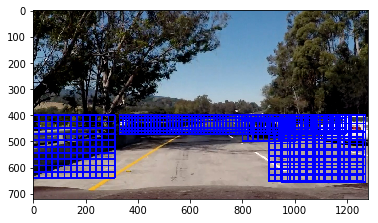

In [45]:
img = cv2.imread('test_images/test5.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
boxes = []
boxes = find_cars(img, test='On', ystart=400, ystop=656, xstart=950, xstop=1280, scale=2.0, svc=svc, X_scaler=X_scaler, 
                  orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                  spatial_size=spatial_size, hist_bins=hist_bins)[1]
boxes += find_cars(img, test='On', ystart=400, ystop=500, xstart=950, xstop=1280, scale=1.5, svc=svc, X_scaler=X_scaler, 
                  orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                  spatial_size=spatial_size, hist_bins=hist_bins)[1]
boxes += find_cars(img, test='On', ystart=400, ystop=656, xstart=0, xstop=330, scale=2, svc=svc, X_scaler=X_scaler, 
                  orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                  spatial_size=spatial_size, hist_bins=hist_bins)[1]
boxes += find_cars(img, test='On', ystart=400, ystop=500, xstart=0, xstop=330, scale=1.5, svc=svc, X_scaler=X_scaler, 
                  orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                  spatial_size=spatial_size, hist_bins=hist_bins)[1]
boxes += find_cars(img, test='On', ystart=400, ystop=480, xstart=330, xstop=1200, scale=0.75, svc=svc, X_scaler=X_scaler, 
                  orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                  spatial_size=spatial_size, hist_bins=hist_bins)[1]
boxes += find_cars(img, test='On', ystart=420, ystop=500, xstart=800, xstop=1000, scale=1.25, svc=svc, X_scaler=X_scaler, 
                  orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                  spatial_size=spatial_size, hist_bins=hist_bins)[1]
boxes += find_cars(img, test='On', ystart=460, ystop=656, xstart=900, xstop=1280, scale=1.5, svc=svc, X_scaler=X_scaler, 
                  orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                  spatial_size=spatial_size, hist_bins=hist_bins)[1]
fig3 = plt.figure()
plt.imshow(draw_boxes(img, boxes))
fig3.savefig('output_images/Multiscale_Window.jpg', bbox_inches = 'tight')

In [64]:

def Image_Process1(img):
    boxes = []
    boxes = find_cars(img, test='Off', ystart=400, ystop=656, xstart=950, xstop=1280, scale=2.0, svc=svc, X_scaler=X_scaler, 
                  orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                  spatial_size=spatial_size, hist_bins=hist_bins)[1]
    boxes += find_cars(img, test='Off', ystart=400, ystop=500, xstart=950, xstop=1280, scale=1.5, svc=svc, X_scaler=X_scaler, 
                  orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                  spatial_size=spatial_size, hist_bins=hist_bins)[1]
    boxes += find_cars(img, test='Off', ystart=400, ystop=656, xstart=0, xstop=330, scale=1.5, svc=svc, X_scaler=X_scaler, 
                  orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                  spatial_size=spatial_size, hist_bins=hist_bins)[1]
    boxes += find_cars(img, test='Off', ystart=400, ystop=500, xstart=0, xstop=330, scale=1.5, svc=svc, X_scaler=X_scaler, 
                  orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                  spatial_size=spatial_size, hist_bins=hist_bins)[1]
    boxes += find_cars(img, test='Off', ystart=400, ystop=480, xstart=330, xstop=1200, scale=0.75, svc=svc, X_scaler=X_scaler, 
                  orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                  spatial_size=spatial_size, hist_bins=hist_bins)[1]
    boxes += find_cars(img, test='Off', ystart=420, ystop=500, xstart=800, xstop=1000, scale=1.25, svc=svc, X_scaler=X_scaler, 
                  orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                  spatial_size=spatial_size, hist_bins=hist_bins)[1]
    boxes += find_cars(img, test='Off', ystart=460, ystop=656, xstart=900, xstop=1280, scale=1.5, svc=svc, X_scaler=X_scaler, 
                  orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                  spatial_size=spatial_size, hist_bins=hist_bins)[1]
    
    draw_img = draw_boxes(img, boxes)
    return draw_img, boxes



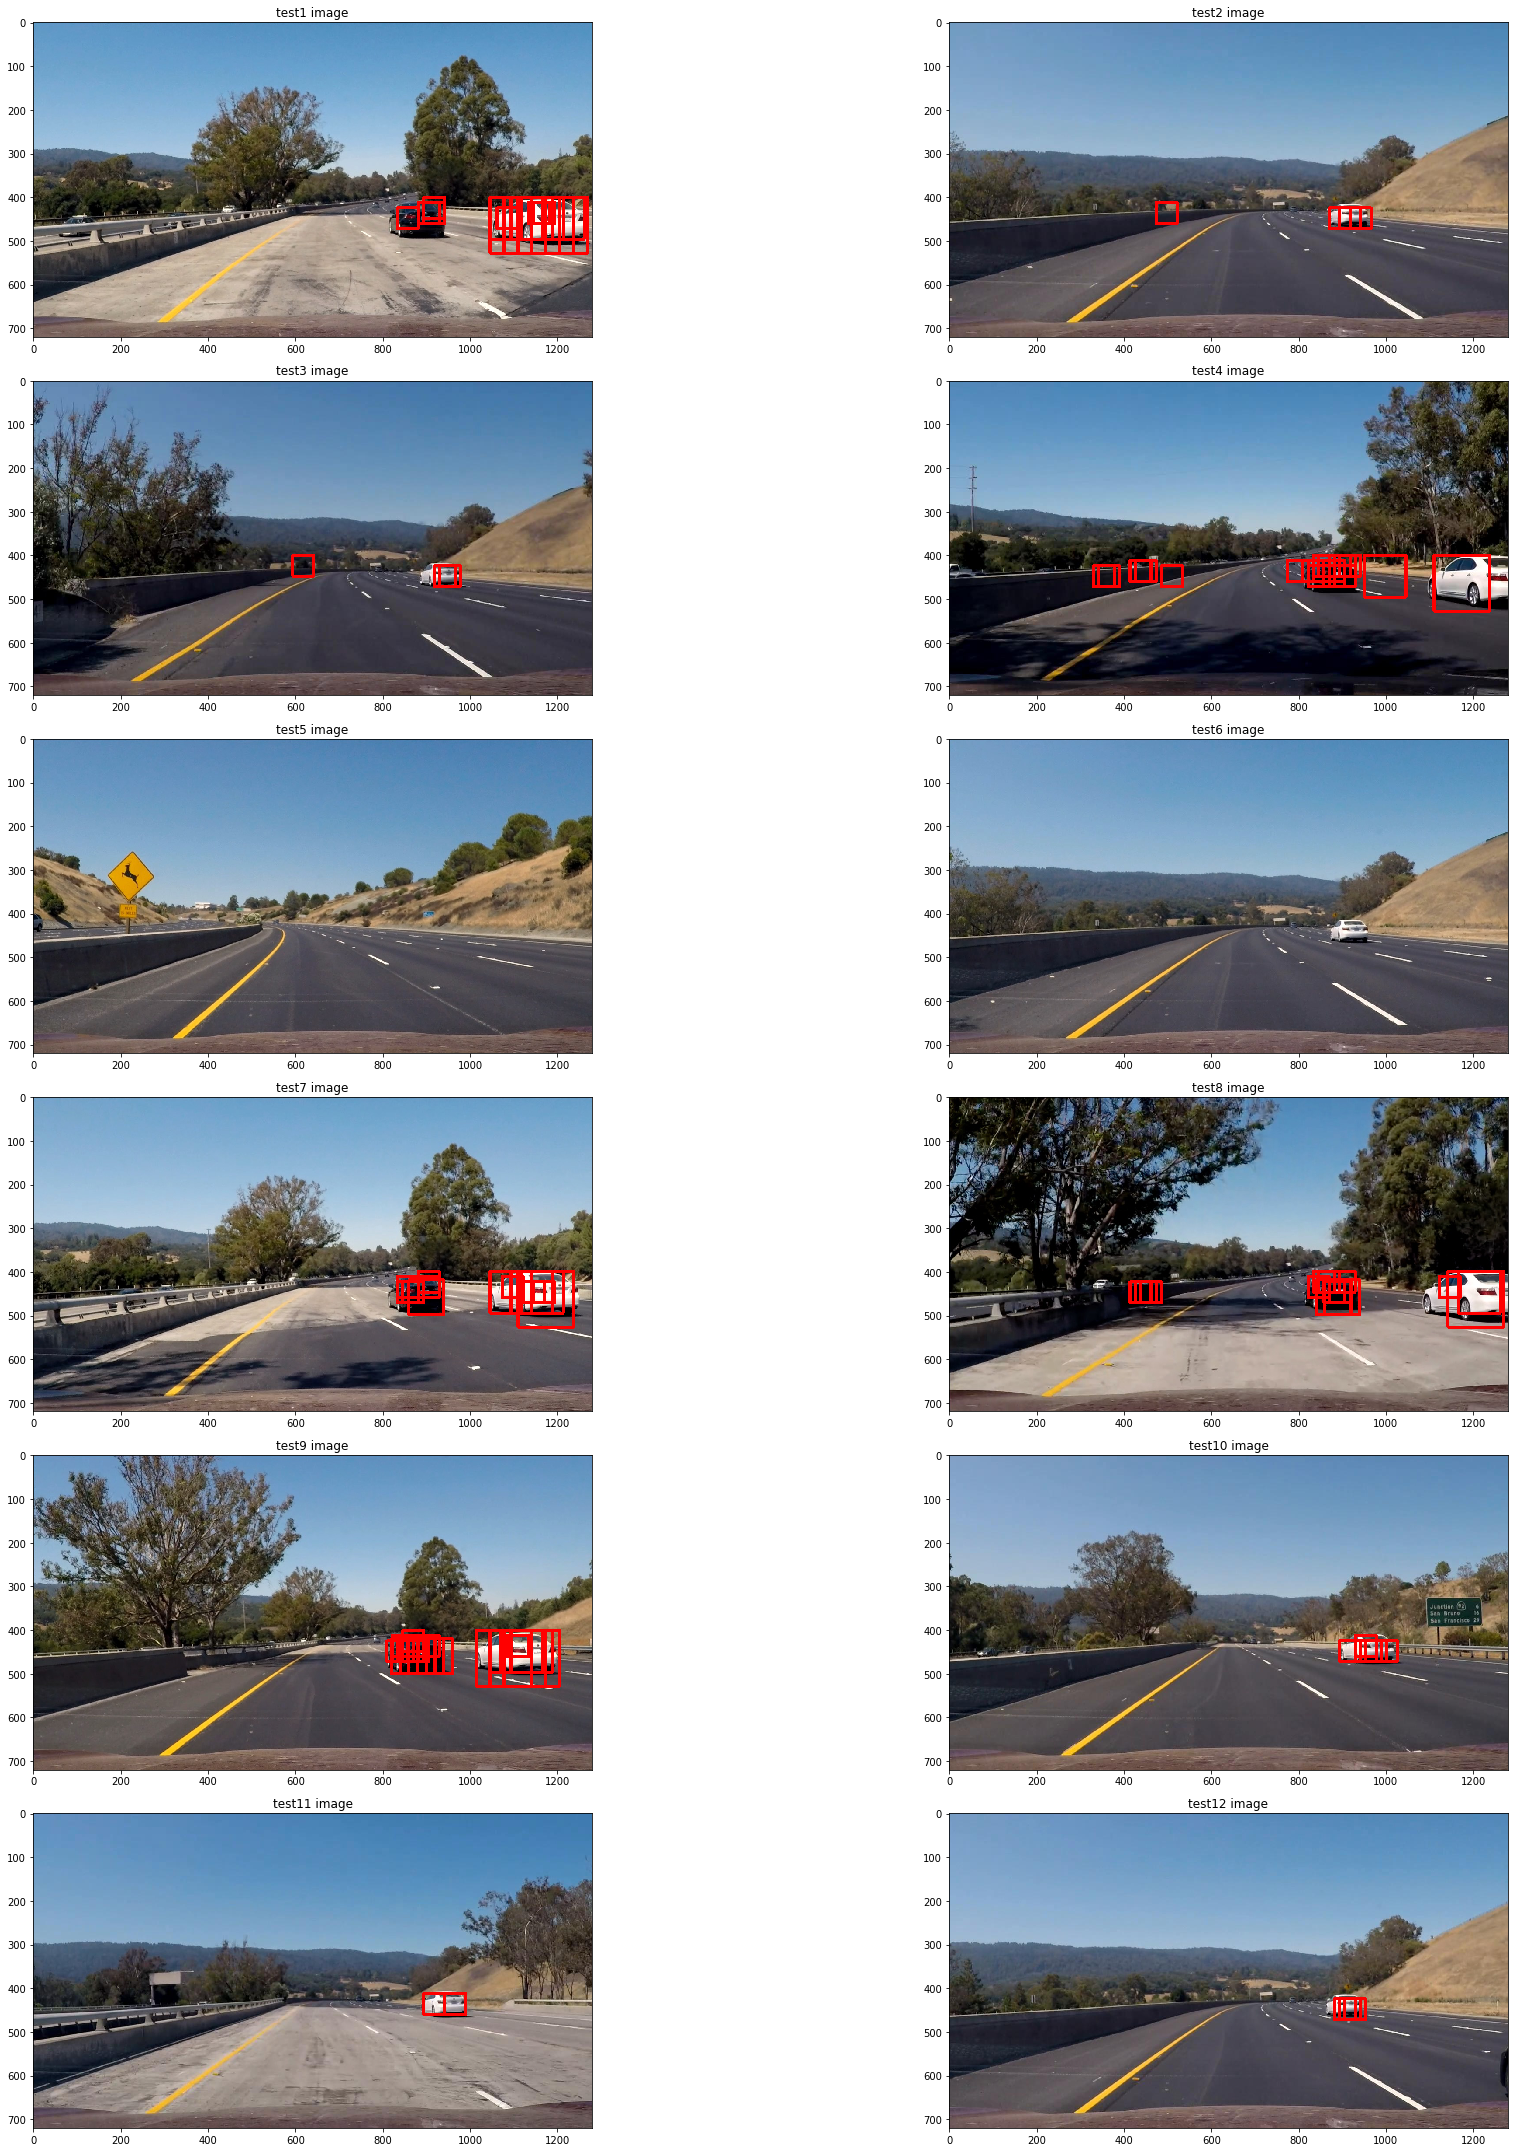

In [86]:
test_images = glob.glob('test_images/test*.jpg')
n = len(test_images)
fig4 = plt.figure(figsize=(30,30))
for i, image_p in enumerate(test_images):
    img = cv2.imread(image_p)
    draw_img = Image_Process1(img)[0]
    plt.subplot(n/2,2,i+1)
    plt.imshow(cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB))
    plt.title('test'+str(i+1)+' '+'image')
    
plt.tight_layout()  
fig4.savefig('output_images/sliding_windows.jpg', bbox_inches = 'tight')

In [87]:
from scipy.ndimage.measurements import label

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    bboxes = []
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        bboxes.append(bbox)
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img, bboxes

def Image_Process_heat(img):
    
    heat = np.zeros_like(img[:,:,0]).astype(np.float)
    out_img, box_list = Image_Process1(img)
    # Add heat to each box in box list
    heat = add_heat(heat,box_list)  
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,threshold = 3)
    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)
    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img, bboxes = draw_labeled_bboxes(np.copy(img), labels)

    return draw_img, heatmap, labels, bboxes



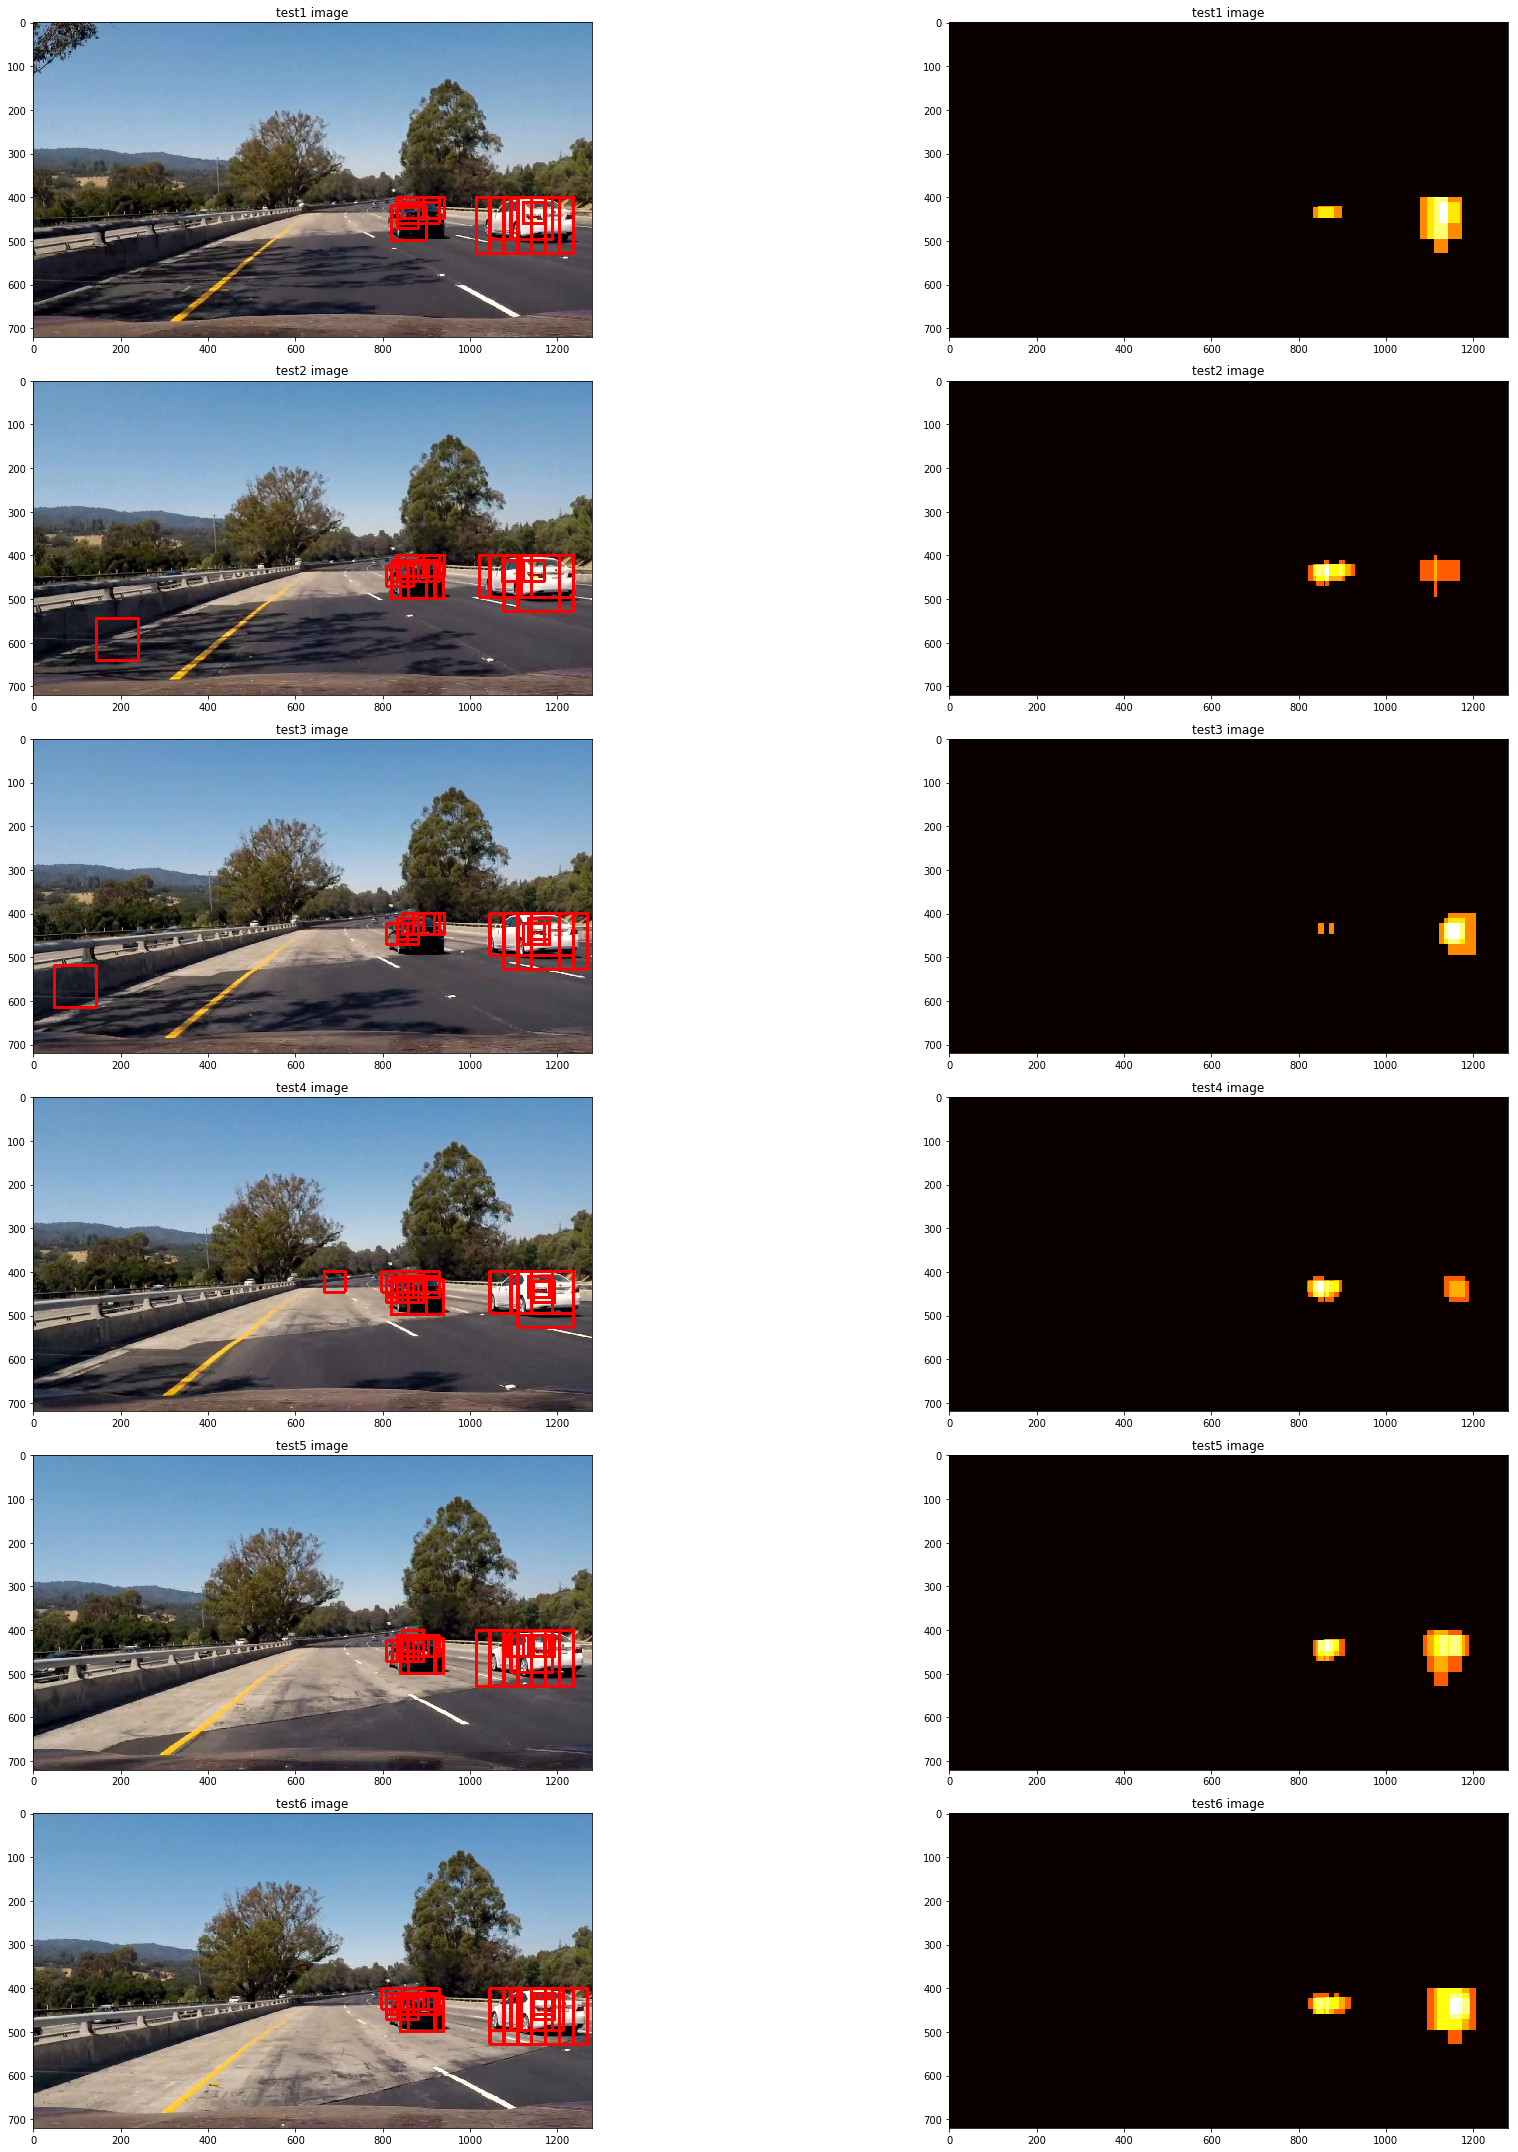

In [88]:
# Plot the result
frames_images = glob.glob('test_images/frame*.jpg')
n = len(frames_images)
fig5 = plt.figure(figsize=(30,30))
for i, image_p in enumerate(frames_images):
    img = cv2.imread(image_p)
    draw_img = Image_Process1(img)[0]
    draw_img_heat = Image_Process_heat(img)[1]
    plt.subplot(n,2,2*i+1)
    plt.imshow(cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB))
    plt.title('test'+str(i+1)+' '+'image')
    
    plt.subplot(n,2,2*i+2)
    plt.imshow(draw_img_heat, cmap='hot')
    plt.title('test'+str(i+1)+' '+'image')
    
plt.tight_layout()  
fig5.savefig('output_images/bboxes_and_heat.jpg', bbox_inches = 'tight')

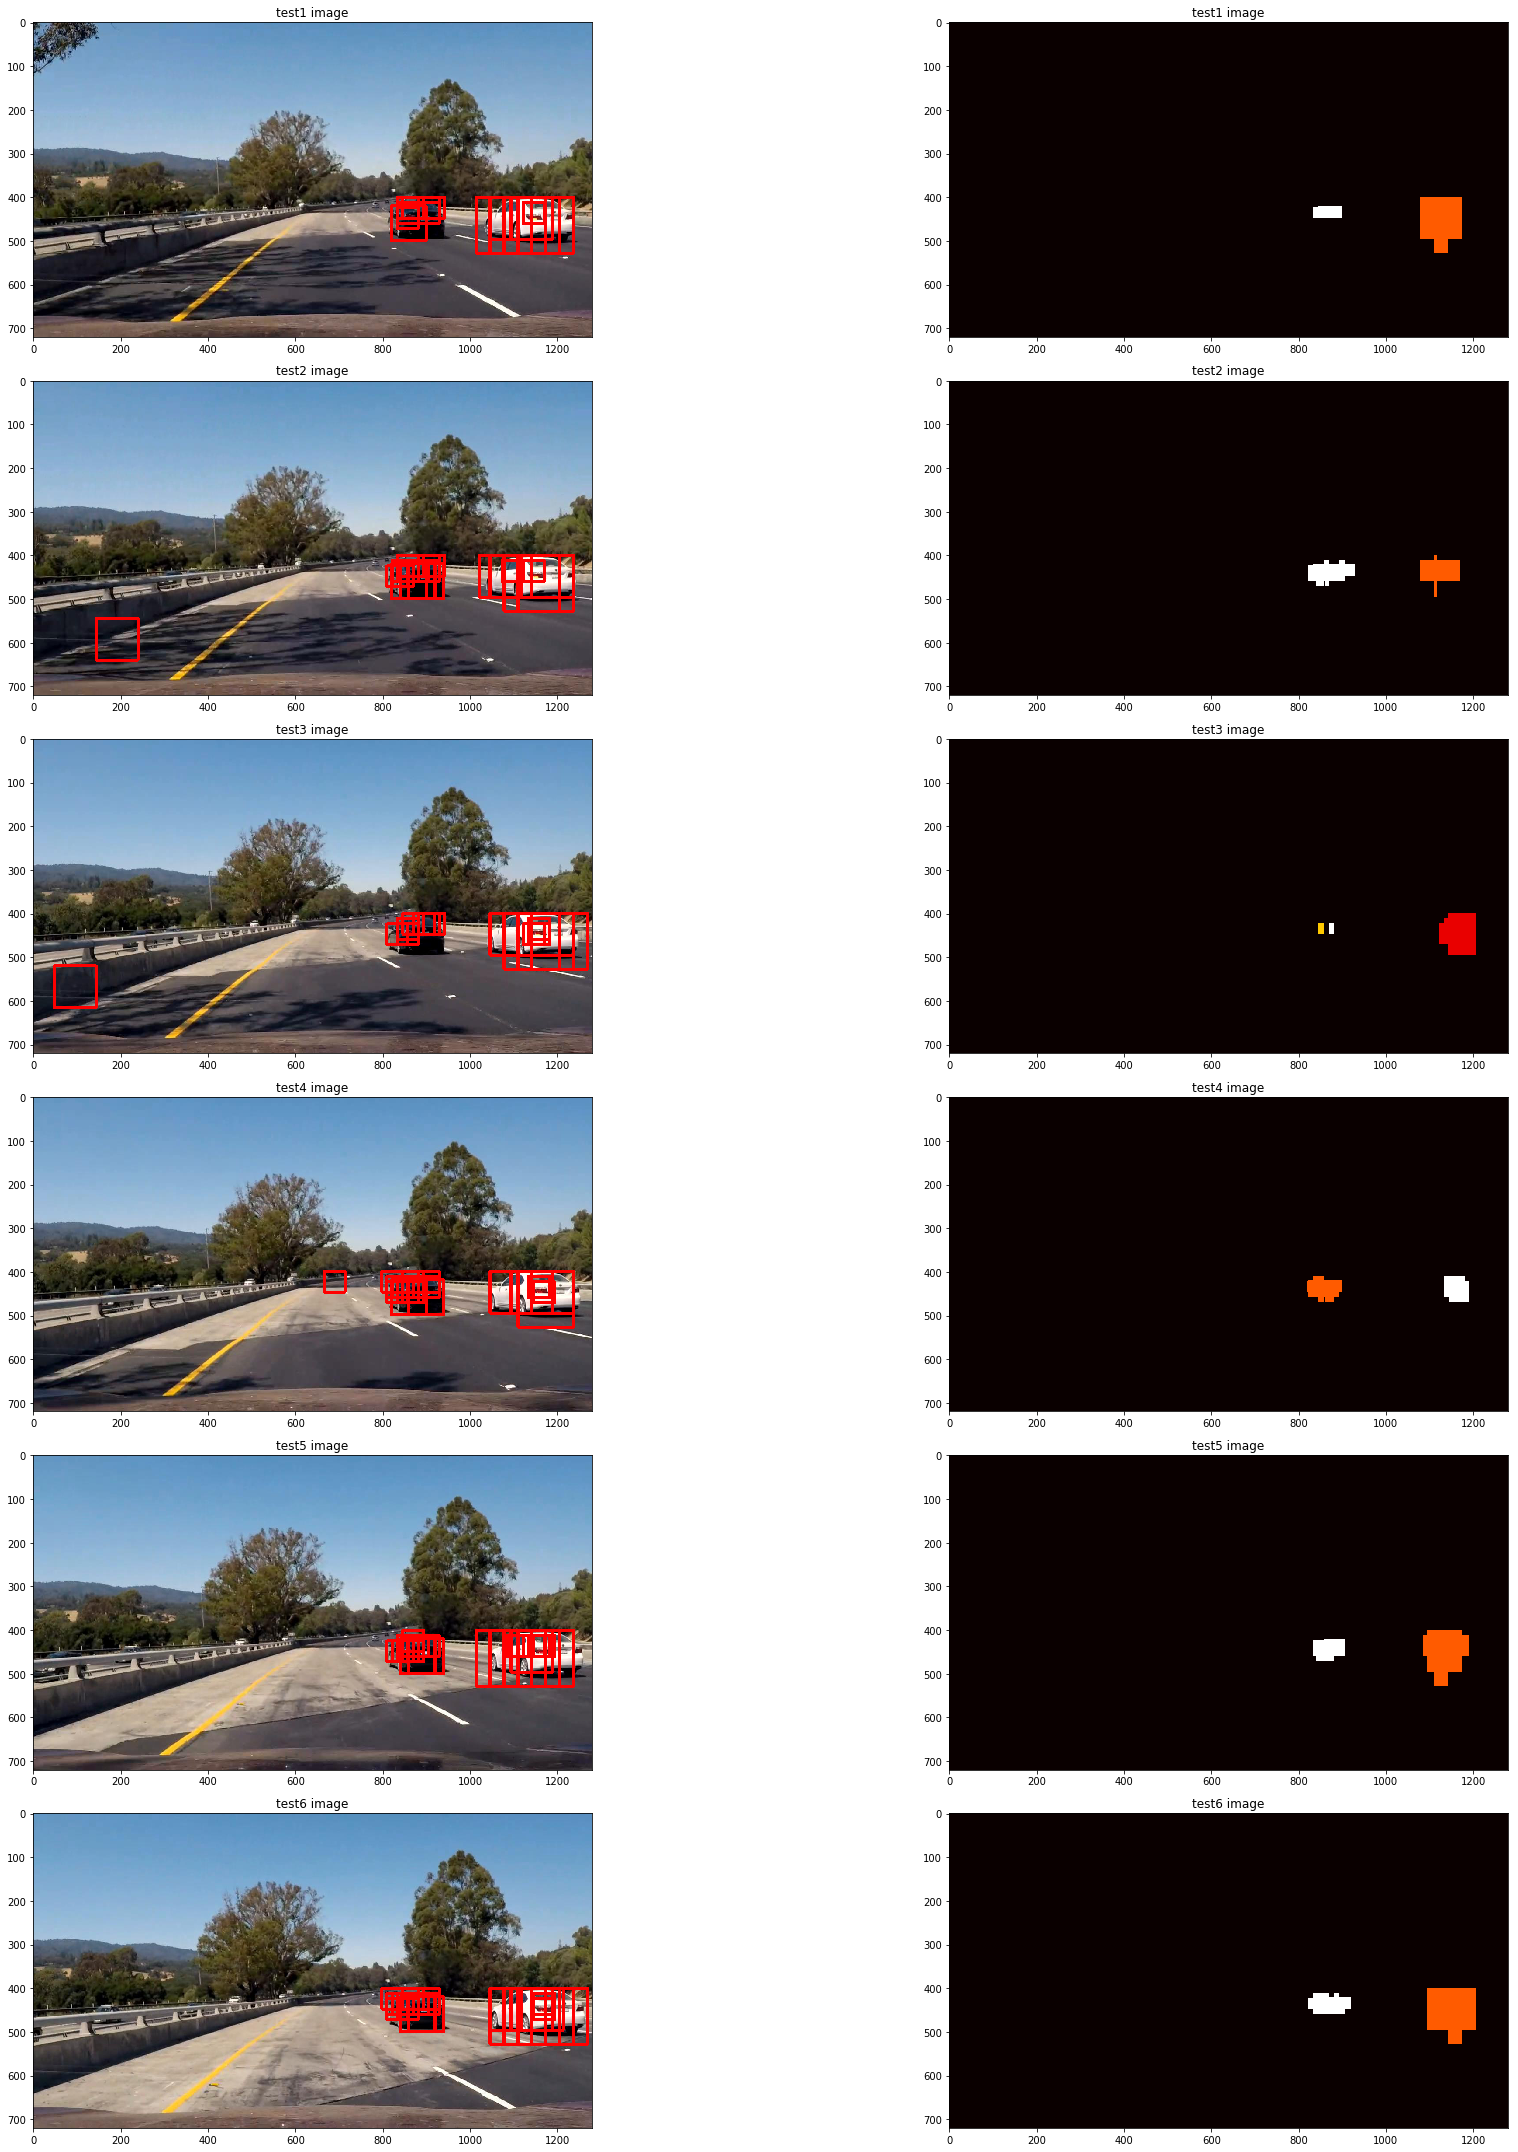

In [89]:
# Plot the result
frames_images = glob.glob('test_images/frame*.jpg')
n = len(frames_images)
fig6 = plt.figure(figsize=(30,30))
for i, image_p in enumerate(frames_images):
    img = cv2.imread(image_p)
    draw_img = Image_Process1(img)[0]
    draw_img_label = Image_Process_heat(img)[2]
    plt.subplot(n,2,2*i+1)
    plt.imshow(cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB))
    plt.title('test'+str(i+1)+' '+'image')
    
    plt.subplot(n,2,2*i+2)
    plt.imshow(draw_img_label[0], cmap='hot')
    plt.title('test'+str(i+1)+' '+'image')
    
plt.tight_layout()  
fig6.savefig('output_images/labels_map.jpg', bbox_inches = 'tight')

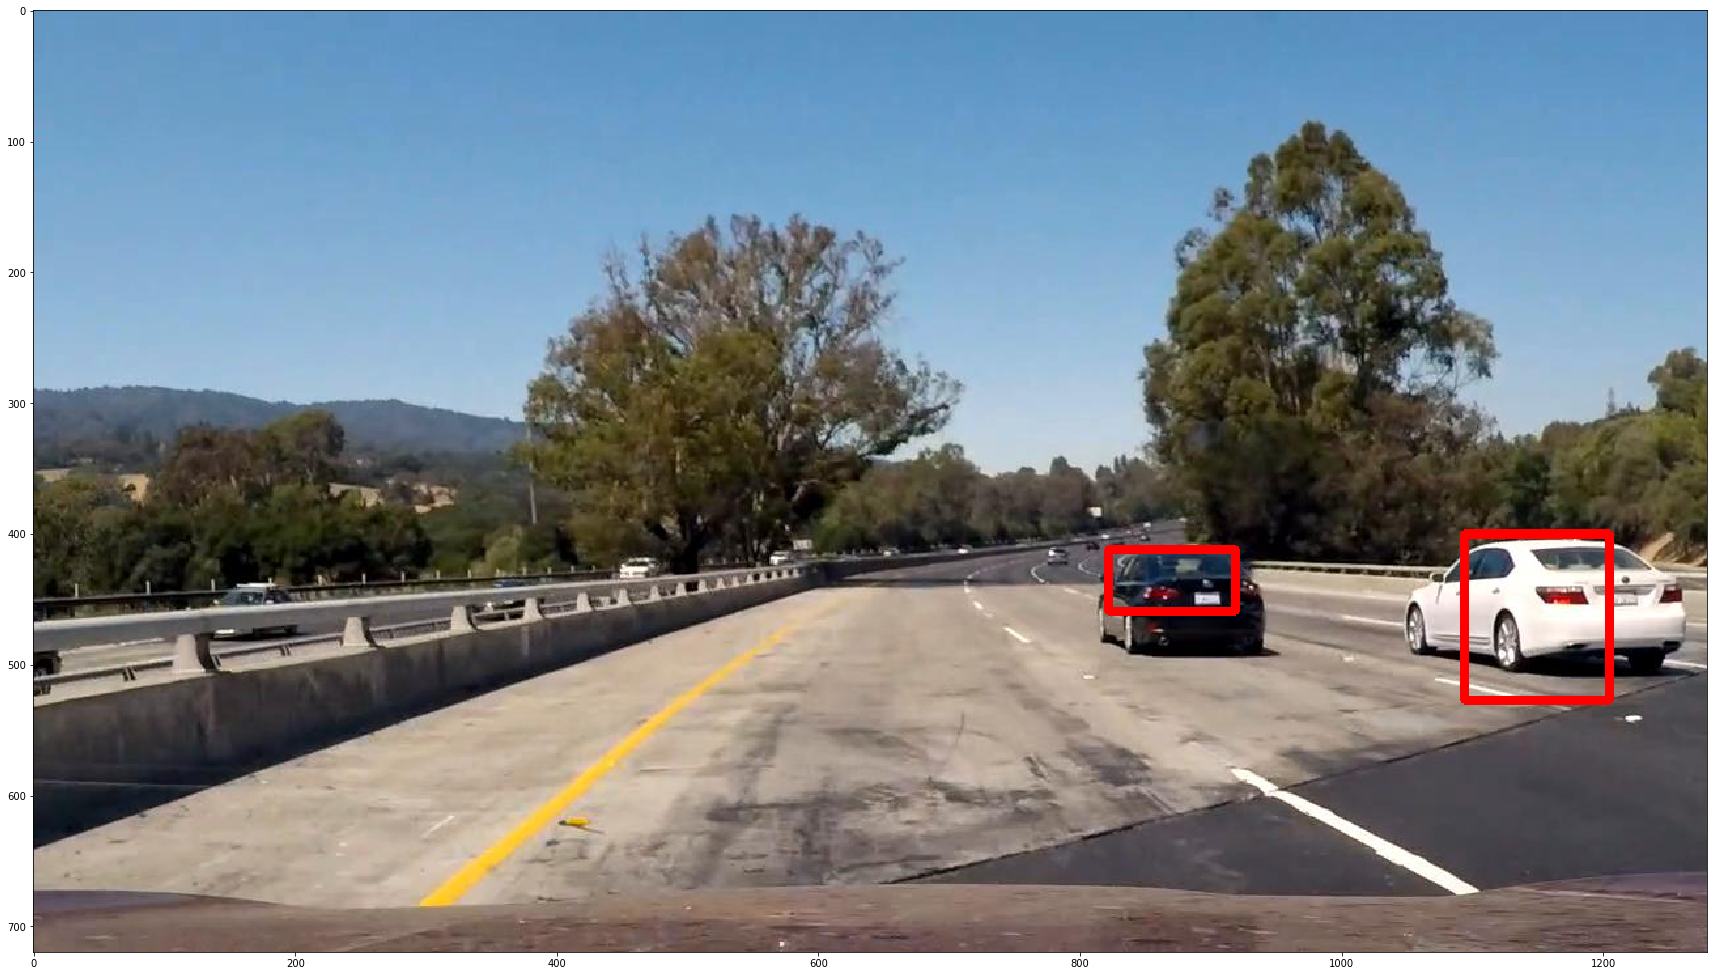

In [90]:
last_frame = cv2.imread('test_images/frame6.jpg')
image_box = Image_Process_heat(last_frame)[0]
fig7 = plt.figure(figsize=(30,30))
plt.imshow(cv2.cvtColor(image_box, cv2.COLOR_BGR2RGB))
fig7.savefig('output_images/output_bboxes.jpg')